In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3  # Change the import statement
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2

In [2]:


# Re-size all the images to the given size
IMAGE_SIZE = [299, 299]  # InceptionV3 requires a different input size

train_path = '/content/drive/MyDrive/Sign Language for Numbers/train'
test_path = '/content/drive/MyDrive/Sign Language for Numbers/test'

# Add preprocessing layer to the front of InceptionV3
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)  # Use InceptionV3

# For not training existing weights
for layer in inception.layers:
    layer.trainable = False

# Useful for getting the number of classes
folders = glob('/content/drive/MyDrive/Sign Language for Numbers/train/*')
len(folders)

87910968/87910968 [==============================] - 1s 0us/step


10

In [3]:


# Layers - you can add more if needed
x = Flatten()(inception.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [4]:


from keras import optimizers
# Tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Sign Language for Numbers/train',
                                                 target_size=(299, 299),
                                                 batch_size=16,
                                                 class_mode='categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Sign Language for Numbers/test',
                                            target_size=(299, 299),
                                            batch_size=16,
                                            class_mode='categorical')

cla = test_set.classes
print(cla)


Found 5000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
[0 0 0 ... 9 9 9]


In [5]:

r = model.fit(training_set, validation_data=test_set,
              epochs=1,
              steps_per_epoch=len(training_set),
              validation_steps=len(test_set))

313/313 [==============================] - 2087s 7s/step - loss: 6.2095 - accuracy: 0.6796 - val_loss: 1.6311 - val_accuracy: 0.5115


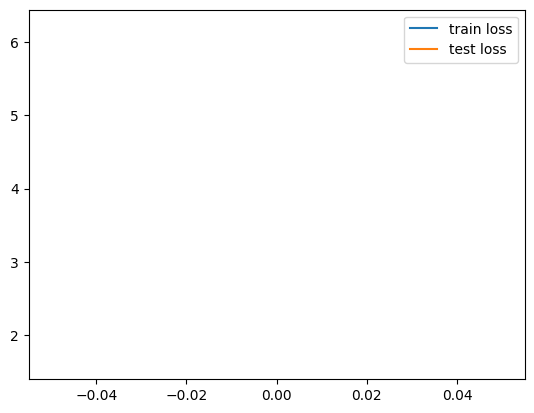

<Figure size 640x480 with 0 Axes>

In [6]:


# Calculate the loss in a graph
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg')

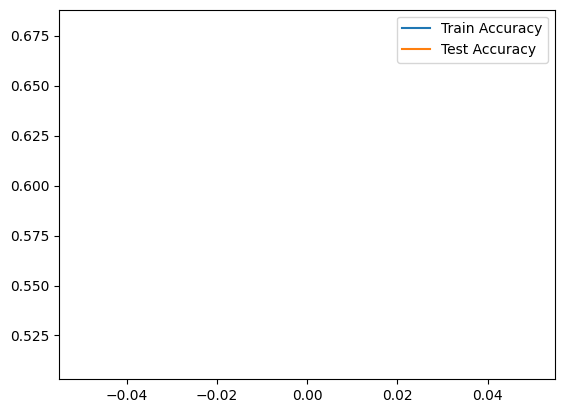

<Figure size 640x480 with 0 Axes>

In [7]:

# Accuracies curve in graphs
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


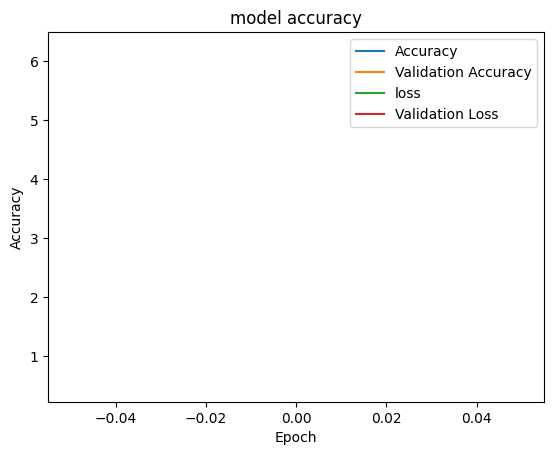

In [8]:


import matplotlib.pyplot as plt
plt.plot(r.history["accuracy"])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
plt.show()


In [9]:

model.save('/content/drive/MyDrive/Sign Language for Numbers/SignCount_InceptionV3_Model.h5')
print("Your model is in ==> ", os.getcwd())


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Your model is in ==>  /content


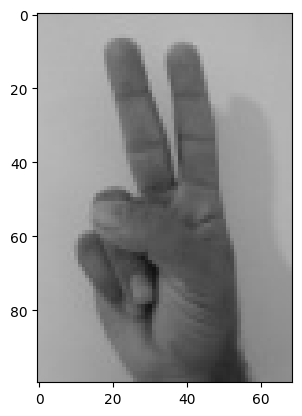

In [10]:

import cv2

img = cv2.imread("/content/drive/MyDrive/Sign Language for Numbers/train/2/two_1.jpg")
img = img/255
plt.imshow(img)

In [16]:


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Sign Language for Numbers/train',
    validation_split=0.17, seed=123,
    subset="training"
)

path = "/content/drive/MyDrive/Sign Language for Numbers/test/3/three_1312.jpg"


Found 5000 files belonging to 10 classes.
Using 4150 files for training.


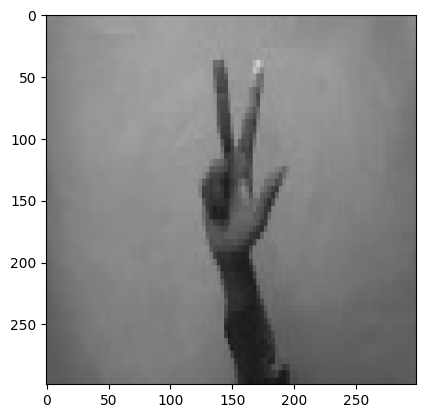

In [17]:

from keras.preprocessing import image
from keras.utils import load_img

img = load_img(path, target_size=(299, 299))
img = np.asarray(img)
plt.imshow(img)

In [18]:


img = np.expand_dims(img, axis=0)
output = model.predict(img)
cls = train_ds.class_names
output = cls[np.argmax(output)]
print(output)


1/1 [==============================] - 0s 197ms/step
3


In [14]:

output = np.argmax(output)
print(output)

0


In [15]:


cls = train_ds.class_names
cls[np.argmax(output)]


'0'